In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import numpy as np


data = dict()
cols = ['Time','mass','a','e','i','omega','Omega','M','dist_jac','dist_cen','x','y','z','u','v','w']

for run in list(range(1,92)) + list(range(100,101)):
    data[run] = dict()
    for sample in range(1,11):
        data[run][sample] = dict()
        planet = pd.read_csv(r'/Users/neha/Documents/lanl/binary mordasini/run'+str(run)+'/PL'+str(sample)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
        for col in cols:
            data[run][sample][col] = dict()
            data[run][sample][col] = [planet[col][0], planet[col][len(planet[col]) - 1]]

In [2]:
data2 = dict()

for run in list(range(1,92)) + list(range(100,101)):  
    numPlanets = 10
    data2[run] = dict()
    data2[run]['time'] = [0]
    data2[run]['planets remaining'] = [numPlanets]
    data2[run]['ejected'] = []
    data2[run]['ejected times'] = []
    data2[run]['star1 collision'] = []
    data2[run]['star1 collision times'] = []
    data2[run]['star2 collision'] = []
    data2[run]['star2 collision times'] = []
    data2[run]['planet-planet collision'] = []
    data2[run]['planet-planet collision times'] = []
    data2[run]['planet-planet collidee'] = []
    
    with open('/Users/neha/Documents/lanl/binary mordasini/run'+str(run)+'/info.out', 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "PL" in line:
                cols = line.split()
                if "ejected" in line:
                    data2[run]['time'].append(float(cols[3]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['ejected'].append(cols[0])
                    data2[run]['ejected times'].append(cols[3])
                elif "STAR2" in line:
                    data2[run]['time'].append(float(cols[6]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['star2 collision'].append(cols[4])
                    data2[run]['star2 collision times'].append(cols[6])
                elif "STAR1" in line:
                    data2[run]['time'].append(float(cols[6]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['star1 collision'].append(cols[4])
                    data2[run]['star1 collision times'].append(cols[6])
                elif "was hit by" in line:
                    data2[run]['time'].append(float(cols[6]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['planet-planet collision'].append(cols[4])
                    data2[run]['planet-planet collision times'].append(cols[6])
                    data2[run]['planet-planet collidee'].append(cols[0])
                else:
                    print(cols)

In [3]:
data3 = dict()
cols = ['Time','mass','a','e','i','omega','Omega','M','dist_jac','dist_cen','x','y','z','u','v','w']

for run in list(range(1,92)) + list(range(100,101)):  
    data3[run] = dict()
    star = pd.read_csv(r'/Users/neha/Documents/lanl/binary mordasini/run'+str(run)+'/STAR2.el', skiprows=2, delimiter=r"\s+", names=cols) 
    for col in cols:
        data3[run][col] = dict()
        data3[run][col] = [star[col][0], star[col][len(star[col]) - 1]]

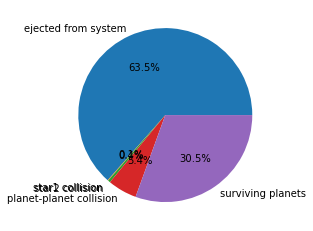

In [98]:
# pie chart of all planet fates
# had to re-do fates here because it wouldn't let me use multiple arrays for the plt.pie command

labels = ["ejected from system", "star1 collision", "star2 collision", "planet-planet collision", "surviving planets"]
fates = [0, 0, 0, 0, 0]


for run in list(range(1,92)) + list(range(100,101)):  

    fates[0] += len(data2[run]['ejected'])
    fates[1] += len(data2[run]['star1 collision'])
    fates[2] += len(data2[run]['star2 collision'])
    fates[3] += len(data2[run]['planet-planet collision'])
    fates[4] += data2[run]['planets remaining'][-1]
    
    
plt.figure()
plt.pie(fates, labels=labels, autopct='%1.1f%%')
plt.show()

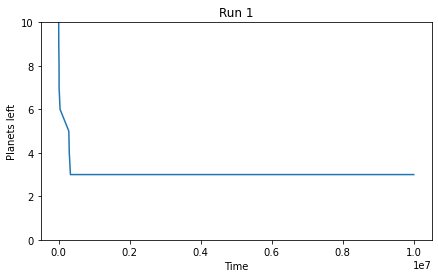

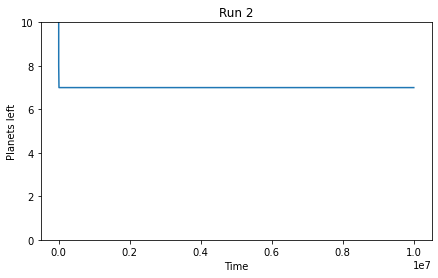

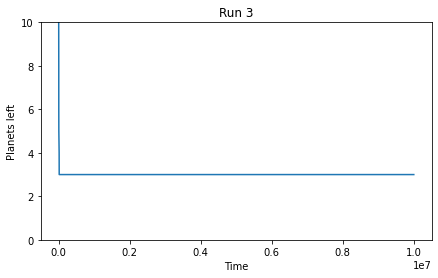

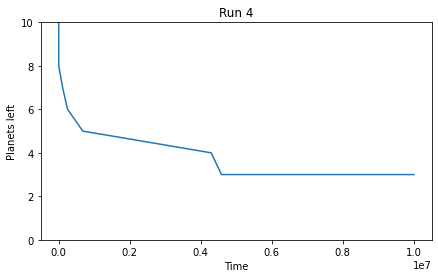

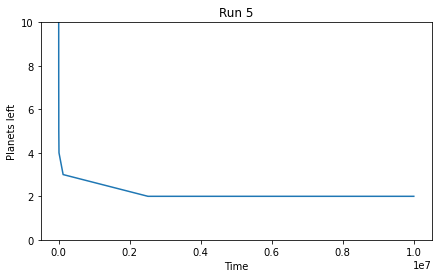

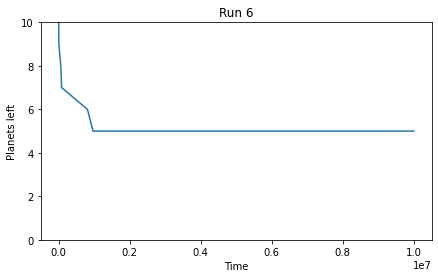

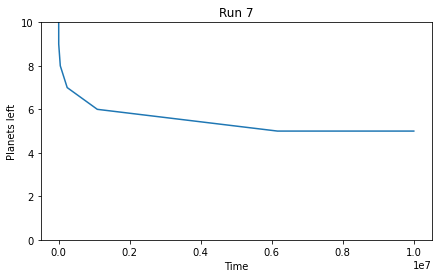

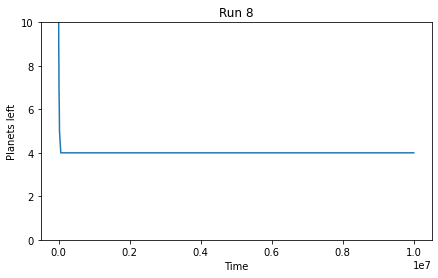

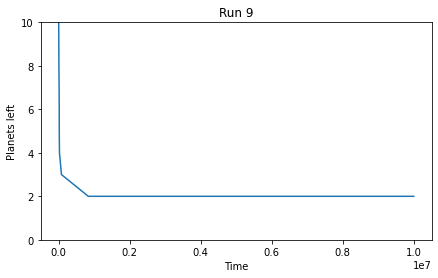

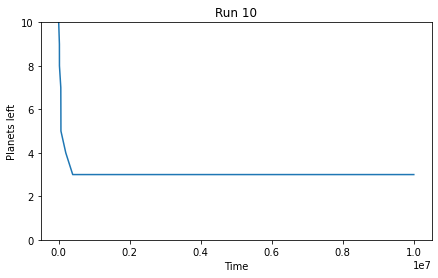

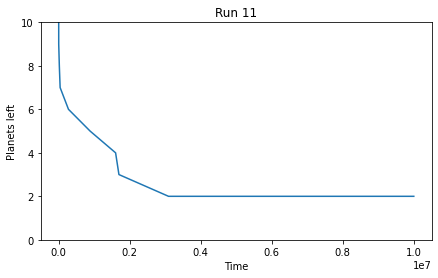

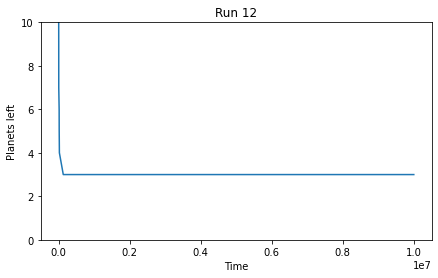

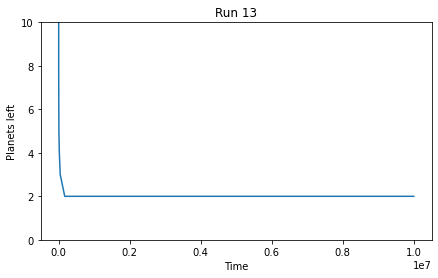

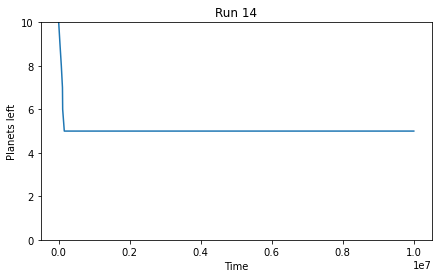

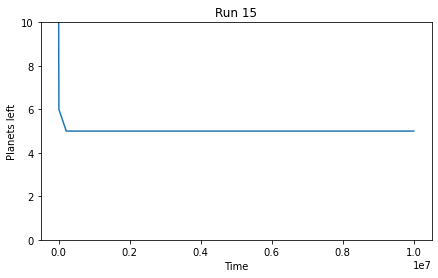

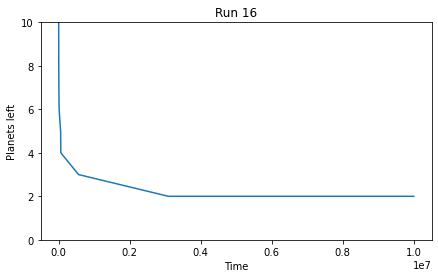

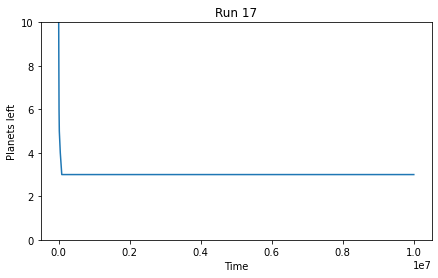

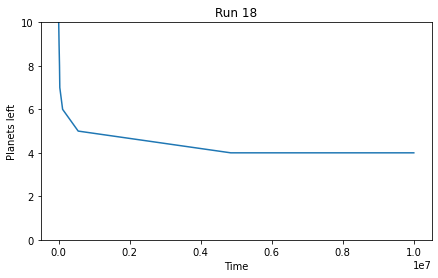

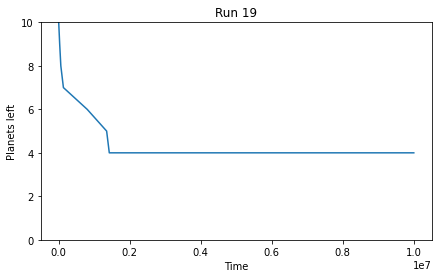

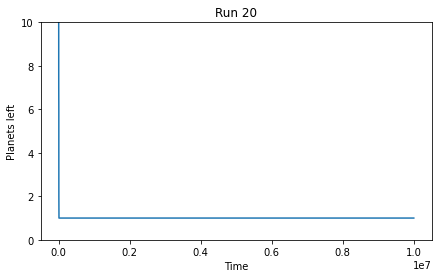

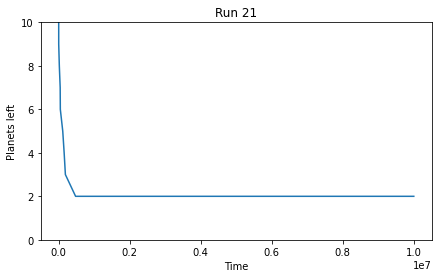

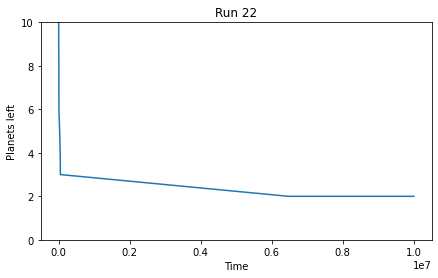

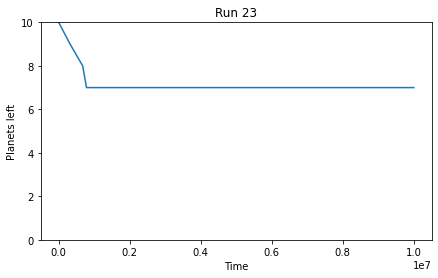

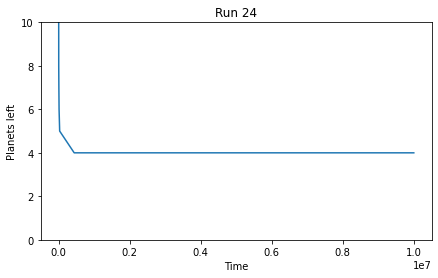

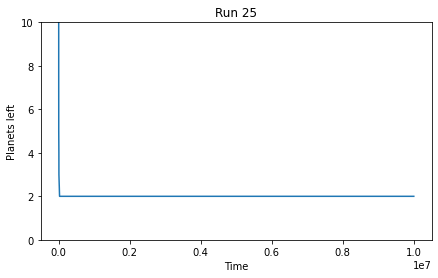

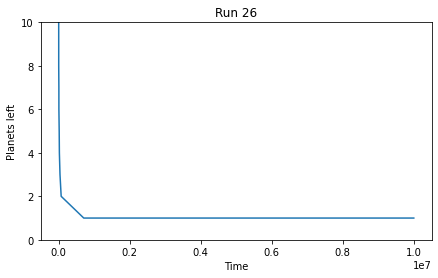

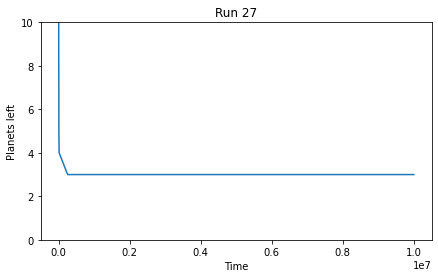

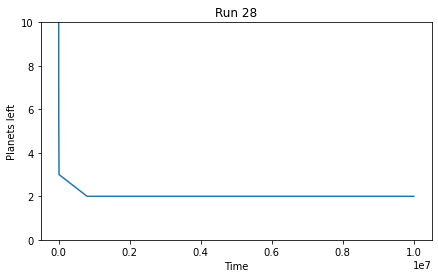

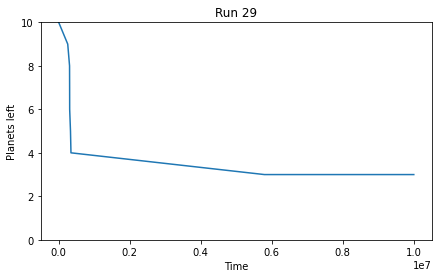

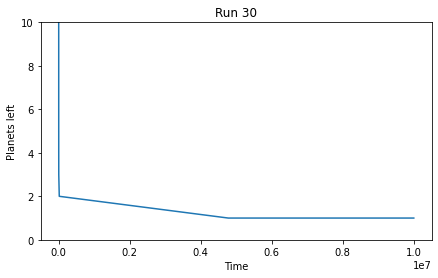

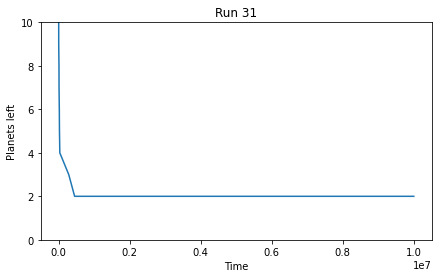

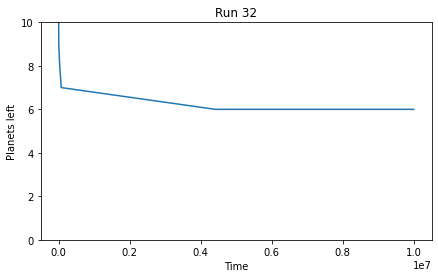

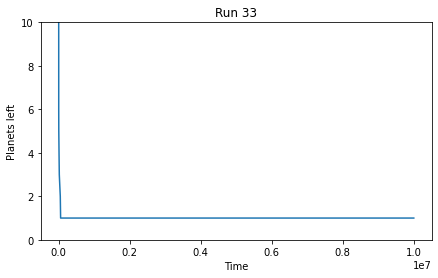

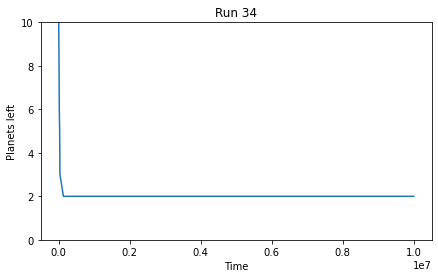

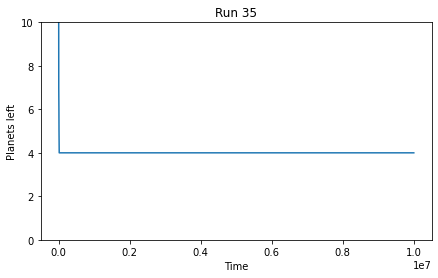

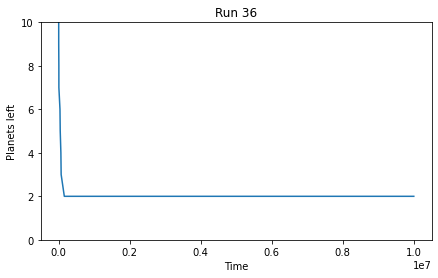

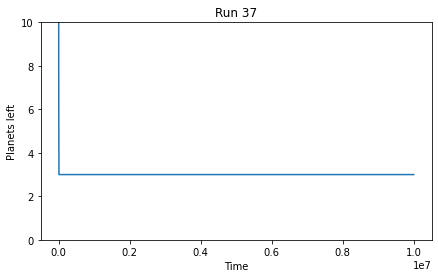

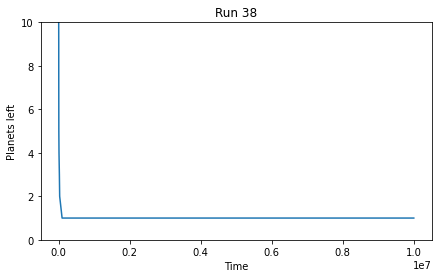

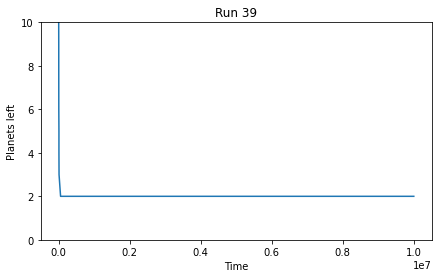

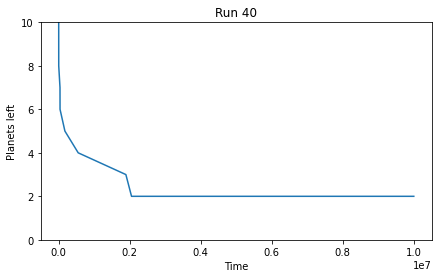

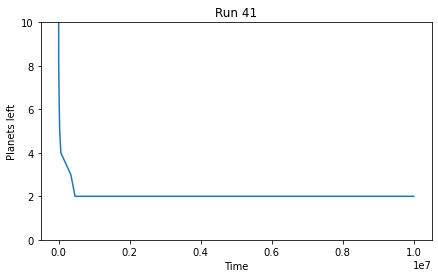

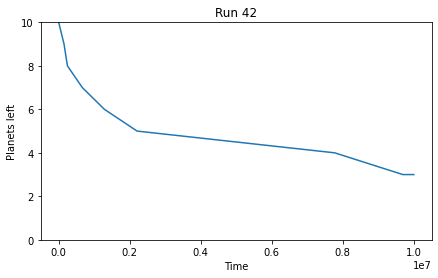

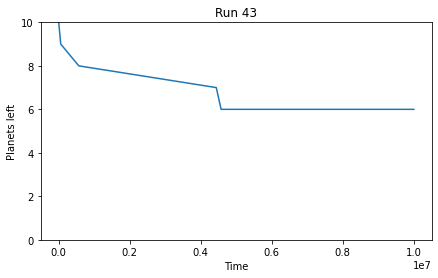

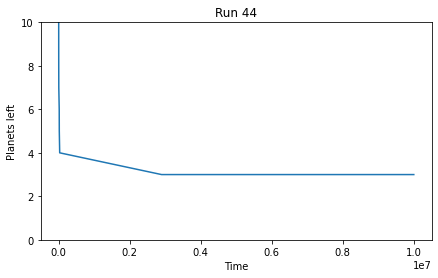

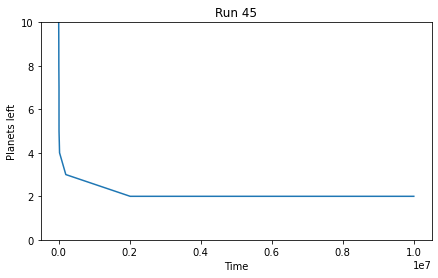

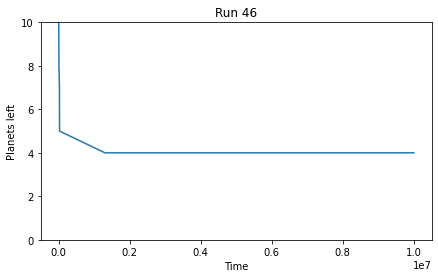

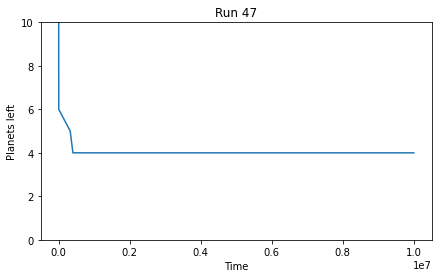

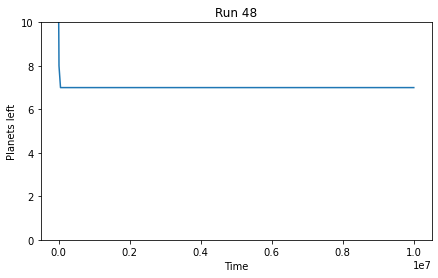

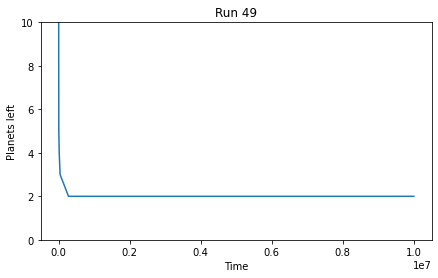

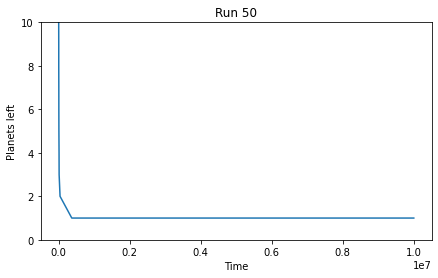

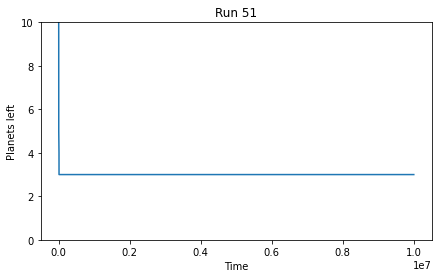

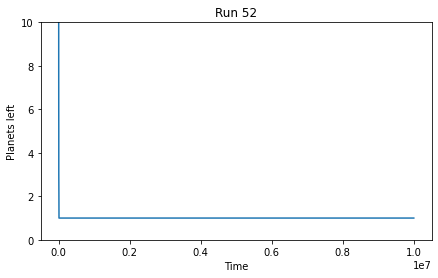

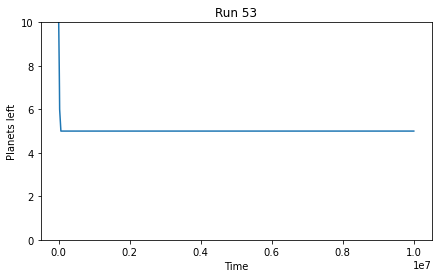

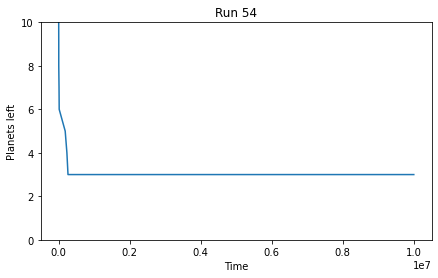

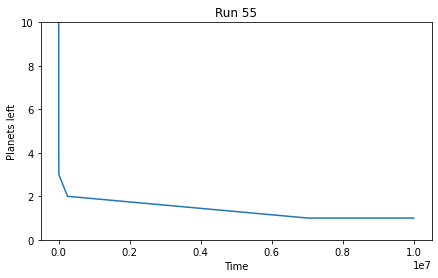

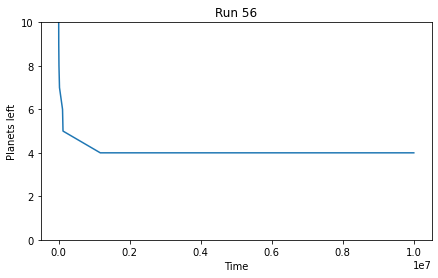

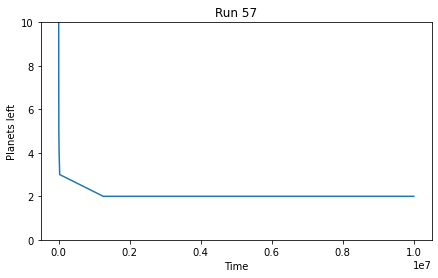

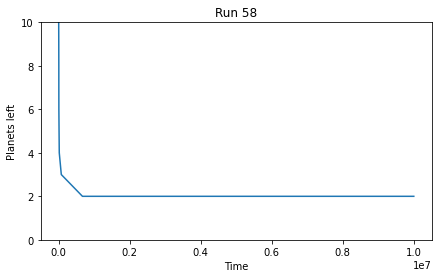

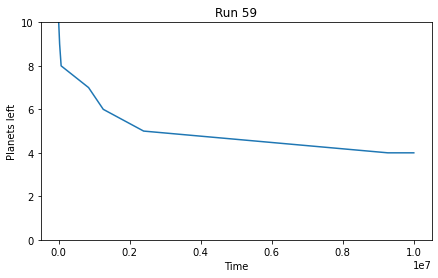

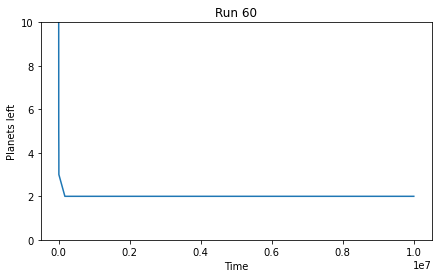

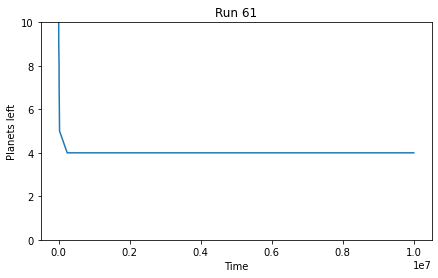

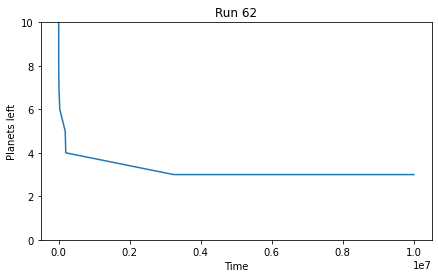

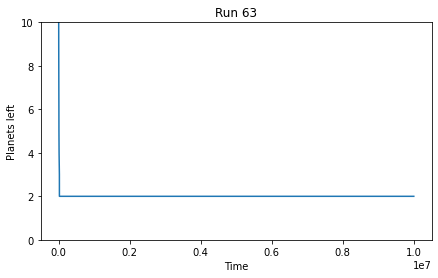

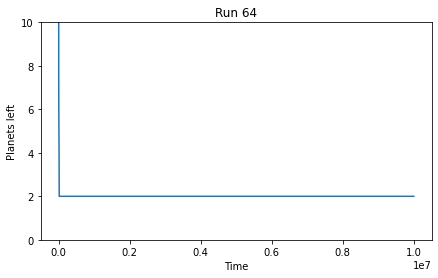

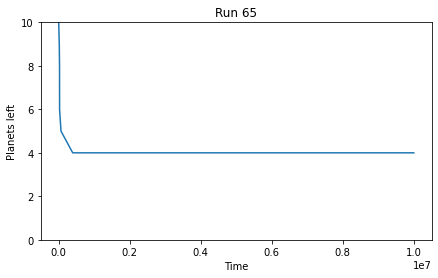

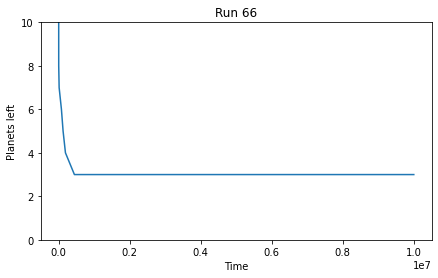

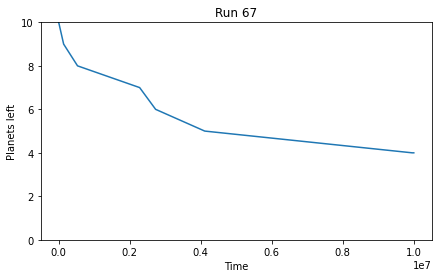

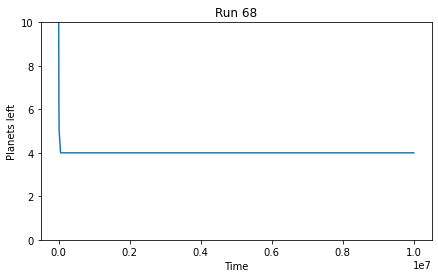

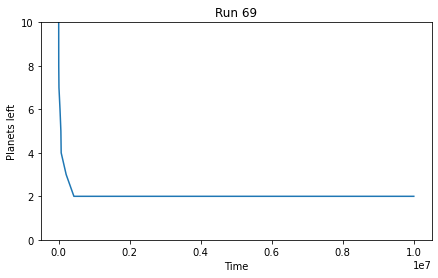

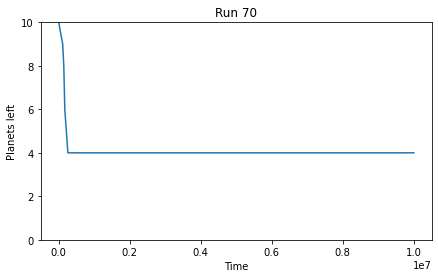

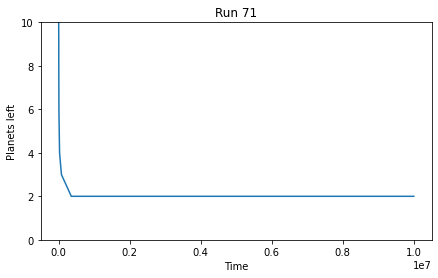

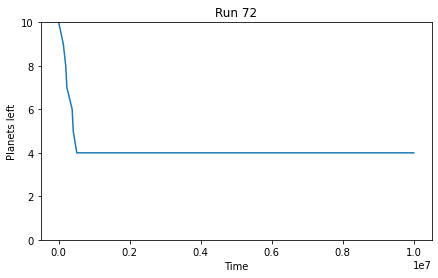

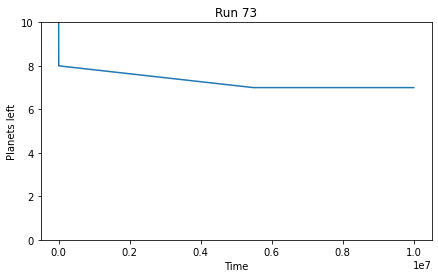

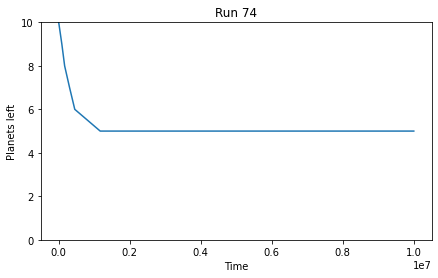

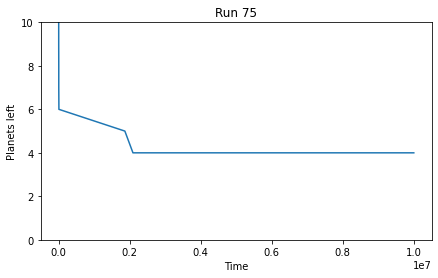

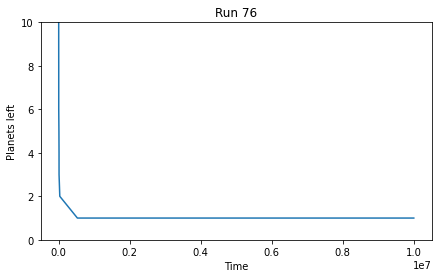

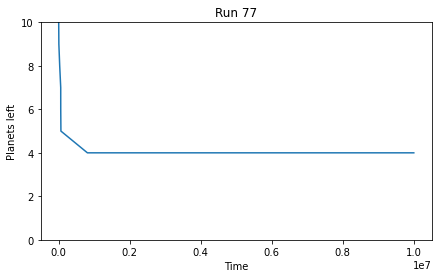

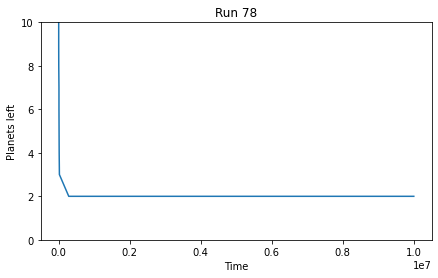

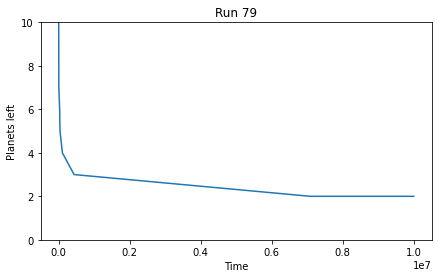

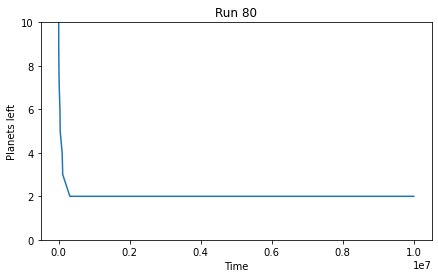

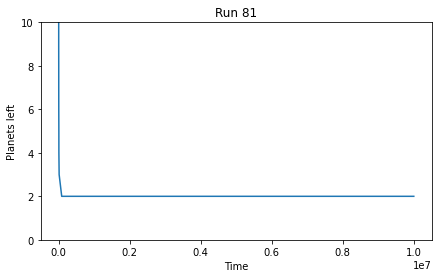

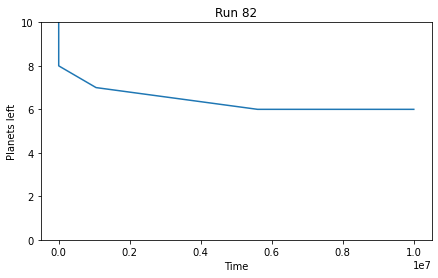

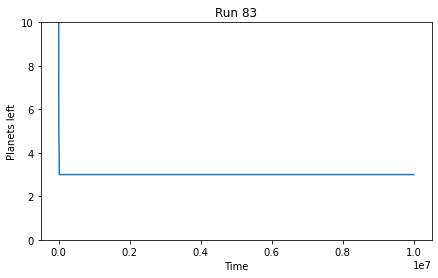

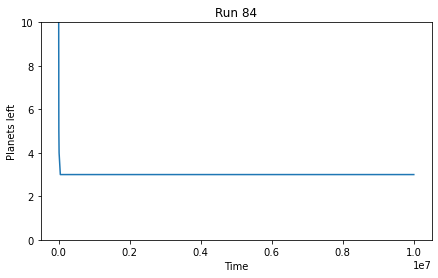

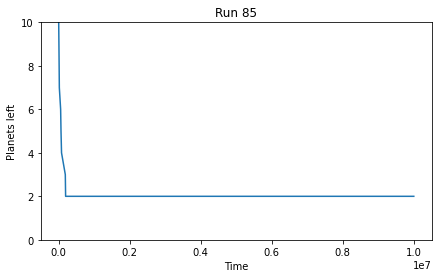

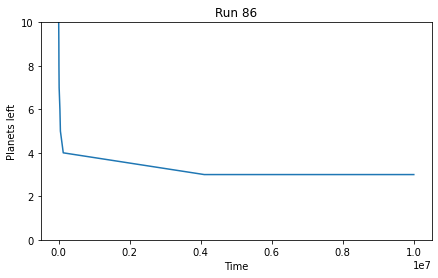

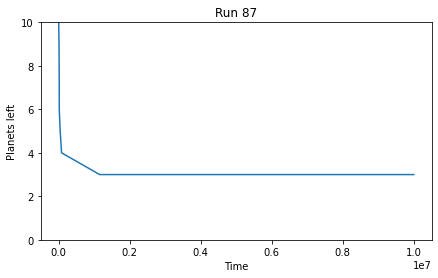

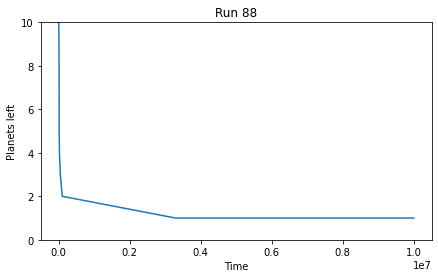

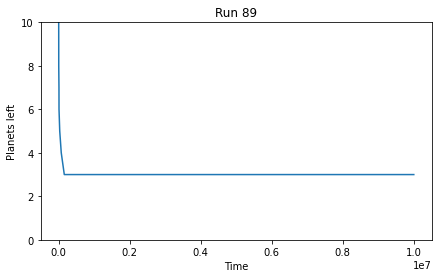

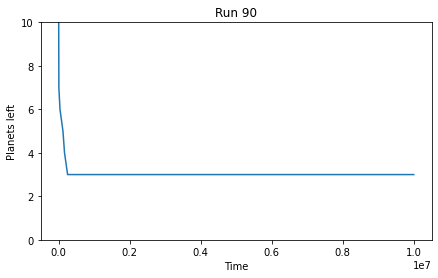

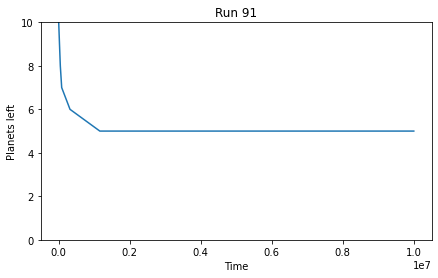

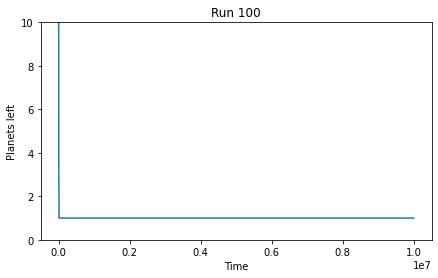

In [101]:
# plot per run

# end of lines through 10^7 years

for run in list(range(1,92)) + list(range(100,101)):  
    f = plt.figure(figsize=(7,4))
    
    if (data2[run]['planets remaining'][-1] > 0):
        data2[run]['time'].append(float(10000000))
        data2[run]['planets remaining'].append(data2[run]['planets remaining'][-1])
    else:
        pass
    
    plt.xlabel('Time')
    plt.ylabel('Planets left')
    plt.title('Run ' + str(run))
    plt.ylim(0,10)
    
    plt.plot(data2[run]['time'], data2[run]['planets remaining'])
    plt.show()
    # plt.savefig('run' + str(i) + '.png')
    # plt.close
    

<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(run['time']), run['planets remaining'])
<ipython-input-103-18f5d9ff6c31>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log

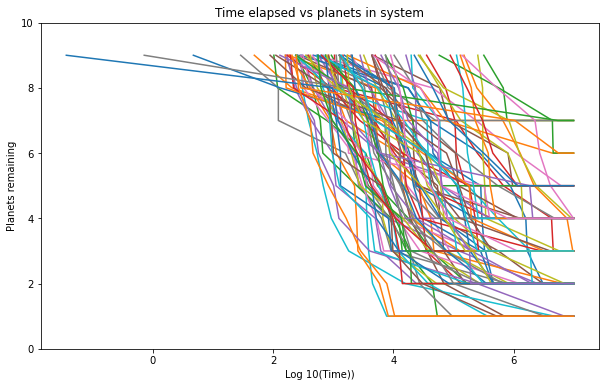

In [103]:
import numpy as np

# overlayed plots

f=plt.figure(figsize=(10,6))

for i in list(range(1,92)) + list(range(100,101)):  
    run = data2[i]
    
    if (run['planets remaining'][-1] > 0):
        run['time'].append(float(10000000))
        run['planets remaining'].append(run['planets remaining'][-1])
    else:
        pass
    
    plt.xlabel('Log 10(Time))')
    plt.ylabel('Planets remaining')
    plt.title('Time elapsed vs planets in system')
    plt.ylim(0,10)
    
    plt.plot(np.log10(run['time']), run['planets remaining'])
    
    # plt.savefig('run' + str(i) + '.png')
    # plt.close
   
    
plt.show()

<ipython-input-107-455327582f00>:14: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(a0, np.log10(a1), color = 'cornflowerblue', alpha = 0.5) # ejected


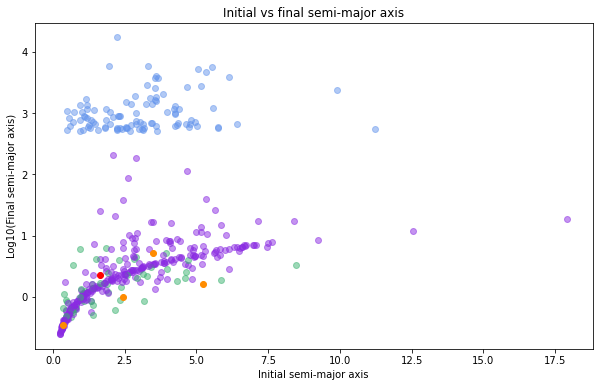

In [107]:
# plotting initial vs final semi-major axis, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0 = data[run][sample]['a'][0]
        a1 = data[run][sample]['a'][1]
        
        if a1 < 0:
            a1 = 0
        if (pl in data2[run]['ejected']):
            plt.scatter(a0, np.log10(a1), color = 'cornflowerblue', alpha = 0.5) # ejected
        elif (pl in data2[run]['star1 collision']):
            plt.scatter(a0, np.log10(a1), color = 'red', zorder = 2) # central body 1
        elif (pl in data2[run]['star2 collision']):
            plt.scatter(a0, np.log10(a1), color = 'darkorange', zorder = 2) # central body 2
        elif (pl in data2[run]['planet-planet collision']):
            plt.scatter(a0, np.log10(a1), color = 'mediumseagreen', alpha = 0.5) # planet-planet
        else:
            plt.scatter(a0, np.log10(a1), color = 'blueviolet', alpha = 0.5) # remaining
            
        
plt.ylabel('Log10(Final semi-major axis)')
plt.xlabel('Initial semi-major axis')
plt.title('Initial vs final semi-major axis')
plt.show()

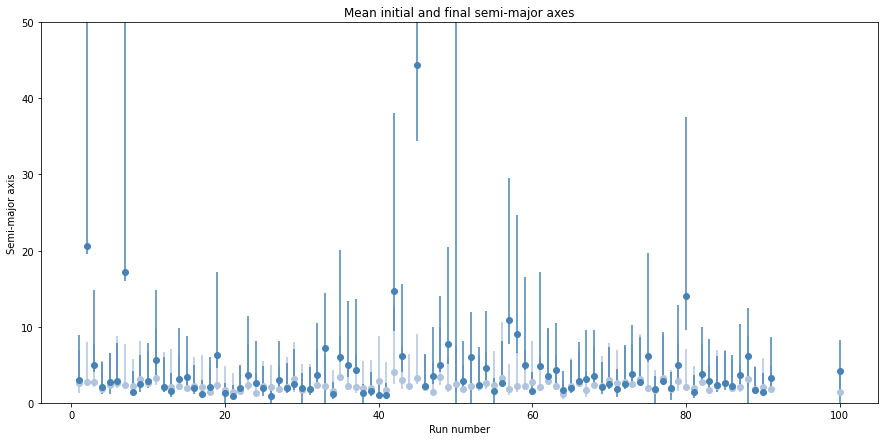

In [160]:
# plotting mean initial and final semi-major axis per run with error bars

f=plt.figure(figsize=(15,7))

for run in list(range(1,92)) + list(range(100,101)):     
    a0 = []
    a1 = []
    
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0.append(data[run][sample]['a'][0])
        
        if(data[run][sample]['Time'][1] == 10000000.0):
            a1.append(data[run][sample]['a'][1])
        
    err0low = np.percentile(a0, 10)
    err0high = np.percentile(a0, 90)
    err1low = np.percentile(a1, 10)
    err1high = np.percentile(a1, 90)
    
    a0 = np.sum(a0)/len(a0)
    a1 = np.sum(a1)/len(a1)
    
    plt.errorbar(run, a0, yerr=np.vstack([err0low, err0high]), fmt = '-o', color = 'lightsteelblue')
    plt.errorbar(run, a1, yerr=np.vstack([err1low, err1high]), fmt = '-o', color = 'steelblue')
 

plt.ylabel('Semi-major axis')
plt.xlabel('Run number')
plt.title('Mean initial and final semi-major axes')
plt.ylim(0,50)
plt.show()

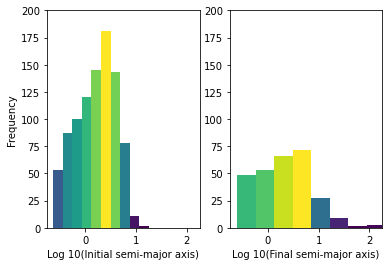

In [111]:
# colored histogram of initial vs final semi-major axis distributions

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, (ax1, ax2) = plt.subplots(1, 2)

x = []
y = []
for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        x.append(data[run][sample]['a'][0])
        
        if(data[run][sample]['Time'][1] == 10000000.0): # only for planets remaining in system
            y.append(data[run][sample]['a'][1])
        
    
plt.subplot(1, 2, 1)
N, bins, patches = plt.hist(np.log10(x), bins = 10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Log 10(Initial semi-major axis)')
plt.ylabel('Frequency')
plt.ylim(0,200)
plt.xlim(-0.75,2.25)


plt.subplot(1, 2, 2)
N, bins, patches = plt.hist(np.log10(y), bins = 8)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Log 10(Final semi-major axis)') 
plt.ylim(0,200)
plt.xlim(-0.75,2.25)

plt.show()

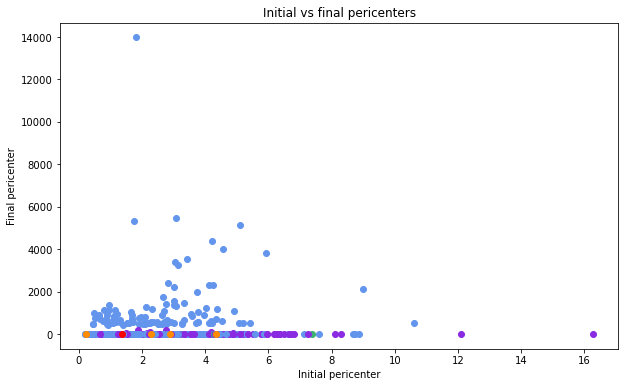

In [112]:
# plotting initial vs final pericenter, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0 = data[run][sample]['a'][0]
        a1 = data[run][sample]['a'][1]
        e0 = data[run][sample]['e'][0]
        e1 = data[run][sample]['e'][1]
        
        if a1 < 0:
            a1 = 0
               
        if (pl in data2[run]['ejected']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'cornflowerblue') # ejected
        elif (pl in data2[run]['star1 collision']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'red', zorder = 2) # central body 1
        elif (pl in data2[run]['star2 collision']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'darkorange', zorder = 2) # central body 2
        elif (pl in data2[run]['planet-planet collision']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'mediumseagreen') # planet-planet
        else:
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'blueviolet') # remaining    
            
            
plt.ylabel('Final pericenter')
plt.xlabel('Initial pericenter')
plt.title('Initial vs final pericenters')
# plt.ylim(-100, 5000)
plt.show()

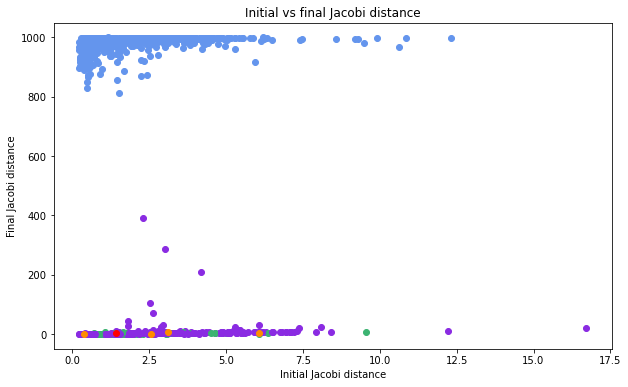

In [490]:
# plotting initial vs final jacobi distance, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        jac0 = data[run][sample]['dist_jac'][0]
        jac1 = data[run][sample]['dist_jac'][1]
        
        if (pl in data2[run]['ejected']):
            plt.scatter(jac0, jac1, color = 'cornflowerblue') # ejected
        elif (pl in data2[run]['star1 collision']):
            plt.scatter(jac0, jac1, color = 'red', zorder = 2) # central body 1
        elif (pl in data2[run]['star2 collision']):
            plt.scatter(jac0, jac1, color = 'darkorange', zorder = 2) # central body 2
        elif (pl in data2[run]['planet-planet collision']):
            plt.scatter(jac0, jac1, color = 'mediumseagreen') # planet-planet
        else:
            plt.scatter(jac0, jac1, color = 'blueviolet') # remaining    
               
plt.ylabel('Final Jacobi distance')
plt.xlabel('Initial Jacobi distance')
plt.title('Initial vs final Jacobi distance')
plt.show()

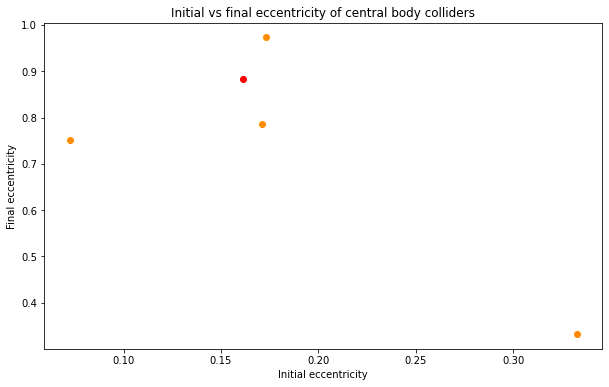

In [184]:
# eccentricity of central body colliders, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        e0 = data[run][sample]['e'][0]
        e1 = data[run][sample]['e'][1]
        
        if (pl in data2[run]['star1 collision']):
            plt.scatter(e0, e1, color = 'red', zorder = 2) # central body 1
        elif (pl in data2[run]['star2 collision']):
            plt.scatter(e0, e1, color = 'darkorange', zorder = 2) # central body 2
          
               
plt.ylabel('Final eccentricity')
plt.xlabel('Initial eccentricity')
plt.title('Initial vs final eccentricity of central body colliders')
plt.show()

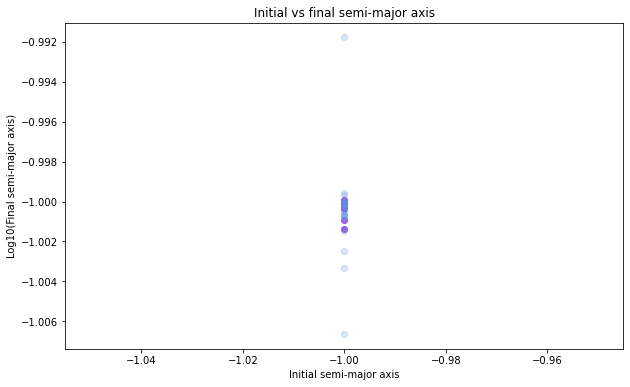

In [41]:
# STAR2 intital vs final semi-major axes


f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    a0 = data3[run]['a'][0]
    a1 = data3[run]['a'][1]
    # j = data3[run]['dist_jac'][1]    
    
    m = max(len(data2[run]['ejected']), len(data2[run]['planet-planet collision']),
            data2[run]['planets remaining'][-1])
    
    
    if (m == len(data2[run]['ejected'])):
        plt.scatter(np.log10(a0), np.log10(a1), color = 'cornflowerblue', alpha = 0.45)
        # plt.scatter(np.log10(j), np.log10(a0), color = 'cornflowerblue', alpha = 0.45)
    else:
        plt.scatter(np.log10(a0), np.log10(a1), color = 'blueviolet', alpha = 0.75)
        # plt.scatter(np.log10(j), np.log10(a0), color = 'blueviolet', alpha = 0.75)
            

            
plt.ylabel('Log10(Final semi-major axis)')
plt.xlabel('Log10(Initial semi-major axis)')
# plt.xlabel('Final jacobi distance')
plt.title('Initial vs final semi-major axis')
plt.show()

In [4]:
# critical delta

data4 = dict()

deltaIA = []
deltaFA = []

for run in list(range(1,92)) + list(range(100,101)):  
    data4[run] = dict()
    data4[run]['initial delta'] = []
    data4[run]['final delta'] = []
    
    for sample in range (1,10):
        m1 = data[run][sample]['mass'][0]
        m2 = data[run][sample+1]['mass'][0]
        a1 = data[run][sample]['a'][0]
        a2 = data[run][sample+1]['a'][0]
        
        if (a1 > a2):
            a1, a2 = a2, a1
                
        mmhrInitial = (((m1 + m2)/3) ** (1/3)) * (a1 + a2)/2
        deltaInitial = (a2-a1)/mmhrInitial
        deltaIA.append(deltaInitial)
        data4[run]['initial delta'].append(deltaInitial)
        
        m1final = 0
        m2final = 0
        a1final = 0
        a2final = 0
       
        if (data[run][sample]['Time'][1] != data[run][sample+1]['Time'][1]):       
            if (data[run][sample]['Time'][1] > data[run][sample+1]['Time'][1]):
                m2final = data[run][sample+1]['mass'][1]
                a2final = data[run][sample+1]['a'][1]
                with open('/Users/neha/Documents/lanl/binary mordasini/run'+str(run)+'/PL'+str(sample)+'.el', 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        cols = line.split()
                        if(str(round(data[run][sample+1]['Time'][1], 7))) in line:
                            m1final = float(cols[1])
                            a1final = float(cols[2])

            else:
                m1final = data[run][sample]['mass'][1]
                a1final = data[run][sample]['a'][1]
                with open('/Users/neha/Documents/lanl/binary mordasini/run'+str(run)+'/PL'+str(sample+1)+'.el', 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        cols = line.split()
                        if(str(round(data[run][sample]['Time'][1], 7))) in line:
                            m2final = float(cols[1])
                            a2final = float(cols[2])

        else:
            m1final = data[run][sample]['mass'][1]
            m2final = data[run][sample+1]['mass'][1]
            a1final = data[run][sample]['a'][1]
            a2final = data[run][sample+1]['a'][1]
        
        if (a1final > a2final):
            a1final, a2final = a2final, a1final

        if (a1final < 0):
            a1final = 0
            
        mmhrFinal = (((m1final + m2final)/3) ** (1/3)) * (a1final + a2final)/2
        deltaFinal = (a2final-a1final)/mmhrFinal
        deltaFA.append(deltaFinal)
        data4[run]['final delta'].append(deltaFinal)

In [5]:
# critical delta

# the problem - taking delta from last time that both are there... only want for planets left in system at end
# and their neighbors. how to find which planets end up next to each other if like 3-4 planets in between leave system

data5 = dict()

deltaF = []

for run in list(range(1,92)) + list(range(100,101)):  
    data5[run] = dict()
    data5[run]['initial delta'] = data4[run]['initial delta']
    data5[run]['final delta'] = []
    
    massa = []
    aa = []
    for sample in range (1,11):
        if (data[run][sample]['Time'][1] == 10000000.0):
            massa.append(data[run][sample]['mass'][1])
            aa.append(data[run][sample]['a'][1])
        
    atemp = np.sort(aa)
    mtemp = []
    
    for i in range(len(massa)):
        ind = aa.index(atemp[i])
        mtemp.append(massa[ind])
 
    
    for c in range(len(atemp)-1):
        m1final = mtemp[c]
        a1final = atemp[c]
        
        m2final = mtemp[c+1]
        a2final = atemp[c+1]
         

        if (a1final < 0):
            a1final = 0
            
        mmhrFinal = (((m1final + m2final)/3) ** (1/3)) * (a1final + a2final)/2
        deltaFinal = (a2final-a1final)/mmhrFinal
        deltaF.append(deltaFinal)
        data5[run]['final delta'].append(deltaFinal)

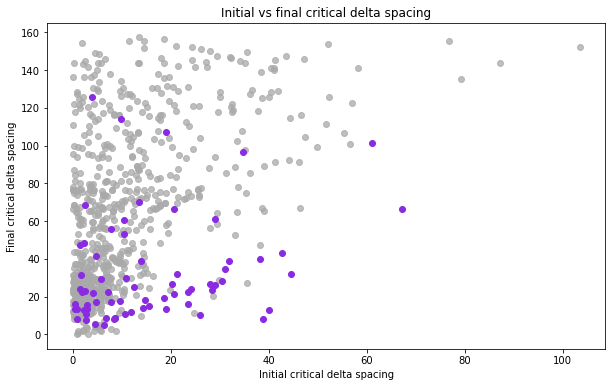

In [421]:
# initial vs final critical delta spacing between two planets, colored by both planet fate
# if one/both planets is not in system, delta value from last timestamp where both are still in orbit

f=plt.figure(figsize=(10,6))

i = 0

for run in list(range(1,92)) + list(range(100,101)):  
    for sample in range(1,10):  
        if (data[run][sample+1]['Time'][1] == 10000000.0) and (data[run][sample]['Time'][1] == 10000000.0):
            plt.scatter(deltaIA[i], deltaFA[i], zorder = 2, color = 'blueviolet')
        else:
            plt.scatter(deltaIA[i], deltaFA[i], color = 'darkgrey', alpha=0.75)
        i += 1
    
        
plt.ylabel('Final critical delta spacing')
plt.xlabel('Initial critical delta spacing')
plt.title('Initial vs final critical delta spacing')
plt.show()

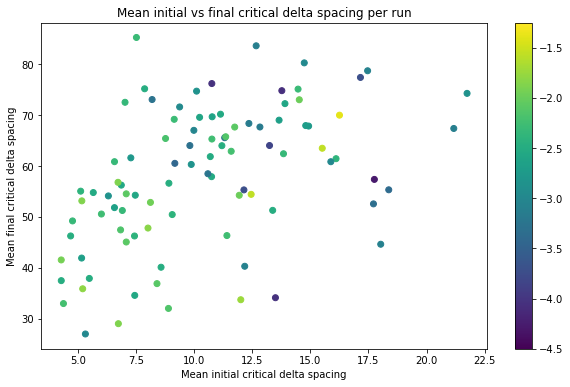

In [431]:
# delta spacing colored by largest mass of system (final)
# if one/both planets is not in system, used delta value from last timestamp where both are still in orbit

f=plt.figure(figsize=(10,6))

init = []
fin = []
colors = []

for run in list(range(1,92)) + list(range(100,101)):  
    init.append(np.mean(data4[run]['initial delta']))
    fin.append(np.mean(data4[run]['final delta']))
    
    smass = []
    for sample in range (1,10):
        smass.append(data[run][sample]['mass'][1])
    
    colors.append(np.log10(np.max(smass)))

    
# plt.scatter(init, fin, c=colors, cmap='binary')
plt.scatter(init, fin, c=colors, vmin=-4.5, vmax=-1.25)
colorbar()
            
plt.ylabel('Mean final critical delta spacing')
plt.xlabel('Mean initial critical delta spacing')
plt.title('Mean initial vs final critical delta spacing per run')
plt.show()


In [ ]:
for run in list(range(1,92)) + list(range(100,101)):  
    if (len(data5[run]['final delta'])) <= 2:
        print(run)

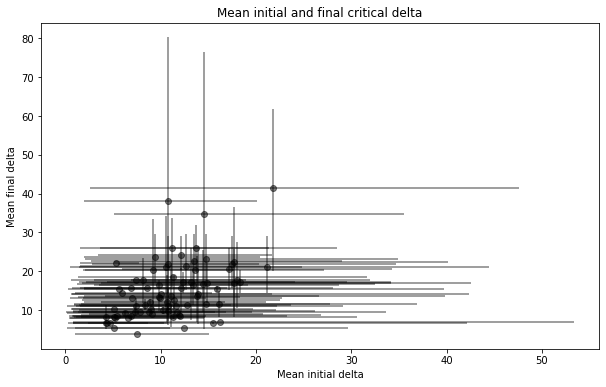

In [472]:
# mean initial vs final delta per run. x and y error bars

f=plt.figure(figsize=(10,6))

for run in list(range(1,92)) + list(range(100,101)):  
    
    xerr=[]
    yerr=[]
    averageI = []
    averageF = []

    if (len(data5[run]['final delta'])) > 0:
        averageI.append(np.mean(data5[run]['initial delta']))
        averageF.append(np.mean(data5[run]['final delta']))
    
        xerrl = averageI[-1] - np.percentile(data5[run]['initial delta'], 10)
        xerrh = np.percentile(data5[run]['initial delta'], 90) - averageI[-1]
    
        yerrl = averageF[-1] - np.percentile(data5[run]['final delta'], 10)
        yerrh = np.percentile(data5[run]['final delta'], 90) - averageF[-1]
    
        xerr.append([xerrl,xerrh])
        yerr.append([yerrl,yerrh])
        
        xerr = np.array(xerr)
        yerr = np.array(yerr)

        xerr=xerr.T
        yerr=yerr.T
        errorbar(averageI,averageF,yerr=yerr,xerr=xerr,fmt='ko', alpha = 0.5)
    
    else:
        pass


plt.ylabel('Mean final delta')
plt.xlabel('Mean initial delta')
plt.title('Mean initial and final critical delta')
plt.show()

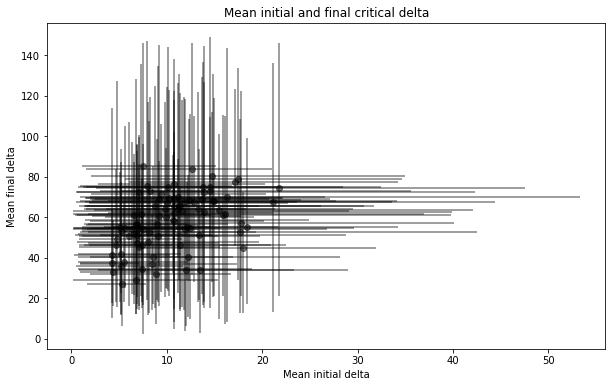

In [476]:
# mean initial vs final delta per run. x and y error bars. same as above, but using last recorded values for
# exiting planets in delta calculations (so all planets are represented even if they didnt reach the end)

f=plt.figure(figsize=(10,6))

xerr=[]
yerr=[]
averageI = []
averageF = []

    
for run in list(range(1,92)) + list(range(100,101)):  
# for run in list(range(1,5)):  
    averageI.append(np.mean(data4[run]['initial delta']))
    averageF.append(np.mean(data4[run]['final delta']))
    
    xerrl = averageI[-1] - np.percentile(data4[run]['initial delta'], 10)
    xerrh = np.percentile(data4[run]['initial delta'], 90) - averageI[-1]
    
    yerrl = averageF[-1] - np.percentile(data4[run]['final delta'], 10)
    yerrh = np.percentile(data4[run]['final delta'], 90) - averageF[-1]
    
    xerr.append([xerrl,xerrh])
    yerr.append([yerrl,yerrh])
 

xerr = np.array(xerr)
yerr = np.array(yerr)

xerr=xerr.T
yerr=yerr.T

errorbar(averageI,averageF,yerr=yerr,xerr=xerr,fmt='ko', alpha = 0.5)

plt.ylabel('Mean final delta')
plt.xlabel('Mean initial delta')
plt.title('Mean initial and final critical delta')
plt.show()

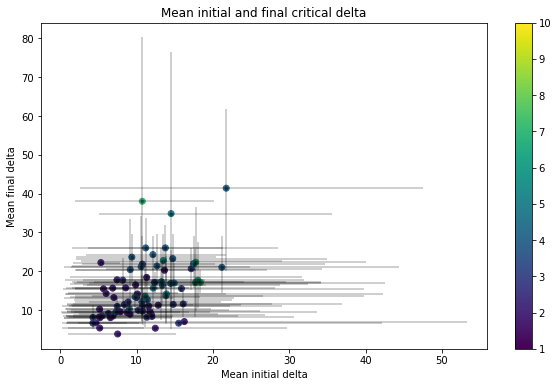

In [6]:
# mean initial vs final delta per run. x and y error bars

f=plt.figure(figsize=(10,6))

xerr=[]
yerr=[]
averageI = []
averageF = []
colors = []
    
for run in list(range(1,92)) + list(range(100,101)):  
    
    if (len(data5[run]['final delta'])) > 0:
        averageI.append(np.mean(data5[run]['initial delta']))
        averageF.append(np.mean(data5[run]['final delta']))
    
        xerrl = averageI[-1] - np.percentile(data5[run]['initial delta'], 10)
        xerrh = np.percentile(data5[run]['initial delta'], 90) - averageI[-1]
    
        yerrl = averageF[-1] - np.percentile(data5[run]['final delta'], 10)
        yerrh = np.percentile(data5[run]['final delta'], 90) - averageF[-1]
    
        xerr.append([xerrl,xerrh])
        yerr.append([yerrl,yerrh])
        
        colors.append(data2[run]['planets remaining'][-1])
        
    else:
        pass
 

xerr = np.array(xerr)
yerr = np.array(yerr)

xerr=xerr.T
yerr=yerr.T
plt.errorbar(averageI,averageF, yerr=yerr, xerr=xerr, fmt='k.', alpha = 0.25)
plt.scatter(averageI, averageF, c=colors, vmin=1, vmax=10)
plt.colorbar()


plt.ylabel('Mean final delta')
plt.xlabel('Mean initial delta')
plt.title('Mean initial and final critical delta')
plt.show()

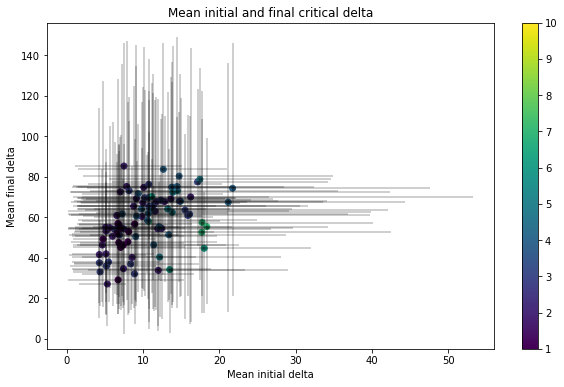

In [486]:
# mean initial vs final delta per run. x and y error bars. last recorded values for
# exiting planets in delta calculations (so all planets are represented even if they didnt reach the end)

f=plt.figure(figsize=(10,6))

xerr=[]
yerr=[]
averageI = []
averageF = []
colors = []
    
for run in list(range(1,92)) + list(range(100,101)):  

    averageI.append(np.mean(data4[run]['initial delta']))
    averageF.append(np.mean(data4[run]['final delta']))
    
    xerrl = averageI[-1] - np.percentile(data4[run]['initial delta'], 10)
    xerrh = np.percentile(data4[run]['initial delta'], 90) - averageI[-1]
    
    yerrl = averageF[-1] - np.percentile(data4[run]['final delta'], 10)
    yerrh = np.percentile(data4[run]['final delta'], 90) - averageF[-1]
    
    xerr.append([xerrl,xerrh])
    yerr.append([yerrl,yerrh])
   
    colors.append(data2[run]['planets remaining'][-1])

    
xerr = np.array(xerr)
yerr = np.array(yerr)

xerr=xerr.T
yerr=yerr.T

plt.errorbar(averageI,averageF, yerr=yerr, xerr=xerr, fmt='k.', alpha = 0.25)
plt.scatter(averageI, averageF, c=colors, vmin=1, vmax=10)
plt.colorbar()


plt.ylabel('Mean final delta')
plt.xlabel('Mean initial delta')
plt.title('Mean initial and final critical delta')
plt.show()

In [156]:
# good runs to use: 3, 5, 55, 81


cols = ['Time','a']

tsim = dict()

for timestep in range(0,3):
    tsim[timestep] = dict()
    for pl in range(1,11):
 
        tsim[timestep][pl] = dict()
        planet = pd.read_csv(r'/Users/neha/Documents/lanl/binary mordasini/run55/PL'+str(pl)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
    
        for col in cols:
            tsim[timestep][pl][col] = dict()
            tsim[timestep][pl][col] = planet[col][timestep]

In [149]:
cols = ['Time','a']

tsim2 = dict()

for timestep in range(0,5):
    for pl in range(1,11):
        tsim2[pl] = dict()
        planet = pd.read_csv(r'/Users/neha/Documents/lanl/binary mordasini/run55/PL'+str(pl)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
    
        for col in cols:
            tsim2[pl][col] = dict()
            tsim2[pl][col][timestep] = planet[col][timestep]

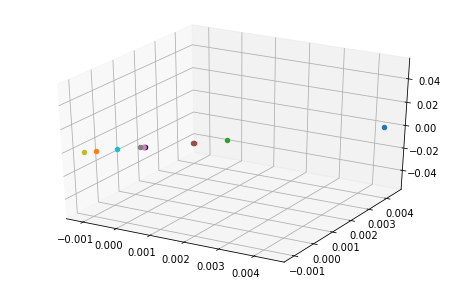

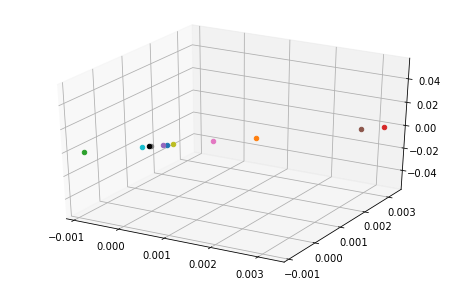

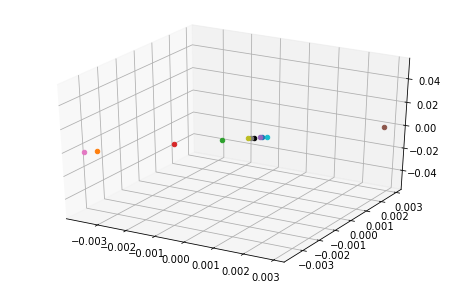

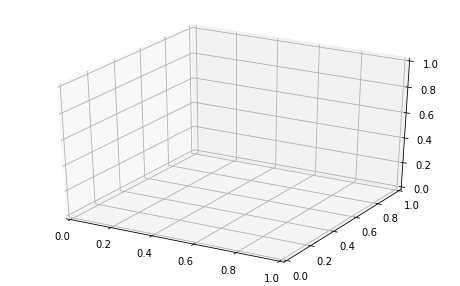

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
# ax.set_xlim3d(-0.003, 0.003)
# ax.set_ylim3d(-0.003, 0.003)
# ax.set_zlim3d(-0.04, 0.04)

for timestep in range(0, 3):
    for pl in range(1,11):
        ax.scatter3D(tsim[timestep][pl]['a'], tsim[timestep][pl]['a'], 0)
    ax.scatter3D(0, 0, 0, color = 'black')
    
    display(fig)
    plt.cla()